In [1]:
import pandas as pd
import datetime as dt
from datetime import datetime
from datetime import date
import matplotlib.pyplot as plt
import re
import requests
pd.options.display.max_rows = 5000 

In [2]:
import requests

url = "https://yahoo-finance15.p.rapidapi.com/api/yahoo/hi/history/cgh.l/1d"

headers = {
    'x-rapidapi-key': "9cd97ba3camsh244cbd2e3e420a4p1e83c0jsne0fdd0787f8e",
    'x-rapidapi-host': "yahoo-finance15.p.rapidapi.com"
    }

response = requests.request("GET", url, headers=headers)

print(response.text)

{
    "meta": {
        "currency": "GBp",
        "symbol": "CGH.L",
        "exchangeName": "LSE",
        "instrumentType": "EQUITY",
        "firstTradeDate": 1194508800,
        "regularMarketTime": 1628177707,
        "gmtoffset": 3600,
        "timezone": "BST",
        "exchangeTimezoneName": "Europe/London",
        "regularMarketPrice": 21,
        "chartPreviousClose": 28,
        "priceHint": 2,
        "dataGranularity": "1d",
        "range": ""
    },
    "items": {
        "1312527600": {
            "date": "05-08-2011",
            "open": 29.9,
            "high": 29.9,
            "low": 27.5,
            "close": 28,
            "adjclose": 28
        },
        "1312786800": {
            "date": "08-08-2011",
            "open": 28.4,
            "high": 28.4,
            "low": 26.5,
            "close": 27.25,
            "adjclose": 27.25
        },
        "1312873200": {
            "date": "09-08-2011",
            "open": 27.35,
            "high": 27.7,
 

In [3]:
string = response.text

In [4]:
string[:1000]

'{\n    "meta": {\n        "currency": "GBp",\n        "symbol": "CGH.L",\n        "exchangeName": "LSE",\n        "instrumentType": "EQUITY",\n        "firstTradeDate": 1194508800,\n        "regularMarketTime": 1628177707,\n        "gmtoffset": 3600,\n        "timezone": "BST",\n        "exchangeTimezoneName": "Europe/London",\n        "regularMarketPrice": 21,\n        "chartPreviousClose": 28,\n        "priceHint": 2,\n        "dataGranularity": "1d",\n        "range": ""\n    },\n    "items": {\n        "1312527600": {\n            "date": "05-08-2011",\n            "open": 29.9,\n            "high": 29.9,\n            "low": 27.5,\n            "close": 28,\n            "adjclose": 28\n        },\n        "1312786800": {\n            "date": "08-08-2011",\n            "open": 28.4,\n            "high": 28.4,\n            "low": 26.5,\n            "close": 27.25,\n            "adjclose": 27.25\n        },\n        "1312873200": {\n            "date": "09-08-2011",\n            "open

- 获取日期data

In [5]:
def get_dates(string):
    date = re.compile('"date":((.*),)')
    date = date.findall(string)
    date = [i[0][2:12] for i in date]
    date = [datetime.strptime(i, "%d-%m-%Y").strftime("%Y-%m-%d") for i in date]
    return date

In [6]:
date = get_dates(string)
print( date[:5] )

['2011-08-05', '2011-08-08', '2011-08-09', '2011-08-10', '2011-08-11']


- 获取close价格

In [7]:
def get_close(string):
    close = re.compile('"close":((.*),)')
    close = close.findall(string)
    close = [float(i[1].strip()) for i in close]
    return close

In [8]:
close = get_close(string)
close[:5]

[28.0, 27.25, 27.75, 27.0, 27.5]

In [10]:
print(len(close))
print(len(date[6:]))

2522
2522


- form dataframe

In [12]:
def form_df(date, close, col_name1, col_name2):
    return pd.DataFrame({col_name1:date[6:], col_name2:close })

In [13]:
cgh = form_df(date, close, 'date', 'cgh_close')
cgh.set_index('date', drop=True, inplace=True)
cgh.tail(3)

,cgh_close
date,
2021-08-03,20.5
2021-08-04,20.3
2021-08-05,21.0


- save dataframe as csv

- IPO and Placing info

In [21]:
p1_sprice = 26
# p1_wprice = 12
p1_date = '2021-02-01'
p1_swratio = 1/1
# p2_sprice = 2.3
# p2_wprice = 3
# p2_date = '2020-09-01'
# p2_swratio = 1/1

#### 技巧：没有数值的Entry设置成None的话，它们就不参与之后的计算。省很多事儿。

In [22]:
cgh['p1_sprice'] = [p1_sprice if i  >= p1_date else None for i in cgh.index]
# cgh['p1_wprice'] = [p1_wprice if i  >= p1_date else None for i in cgh.index]

# cgh['p2_sprice'] = [p2_sprice if i  >= p2_date else None for i in cgh.index]
# cgh['p2_wprice'] = [p2_wprice if i  >= p2_date else None for i in cgh.index]

- If each Placing or IPO investor invest 10000 pounds ever time, what are the positions look like？

In [23]:
fund = 10000
split = 1

In [24]:
cgh['p1_sposition'] = [round(fund/split/p1_sprice,2) if i >= p1_date else 0 for i in cgh.index]
# cgh['p1_wposition'] = cgh['p1_sposition']*p1_swratio


# cgh['p2_sposition'] = [round(fund/split/p2_sprice,2) if i >= p2_date else 0 for i in cgh.index]
# cgh['p2_wposition'] = cgh['p2_sposition']*p2_swratio

- What is the profit looks like， respectively?

In [25]:
# Profit from the shares, 

cgh['p1_sprft'] = cgh.cgh_close - cgh['p1_sprice']

# cgh['p2_sprft'] = cgh.cgh_close - cgh['p2_sprice']

In [26]:
# Profit from the warranties

# p1_wprofit = []
# for i,j in zip(irr.irr_close, irr['p1_wprice']):
#     if i - j >0:
#         p1_wprofit.append(round(i-j,2))
#     else:
#         p1_wprofit.append(0)

# irr['p1_wprft'] = p1_wprofit

# p2_wprofit = []
# for i,j in zip(irr.irr_close, irr['p2_wprice']):
#     if i - j >0:
#         p2_wprofit.append(round(i-j,2))
#     else:
#         p2_wprofit.append(0)

# irr['p2_wprft'] = p2_wprofit

In [27]:
cgh = cgh.fillna(0)

cgh

,cgh_close,p1_sprice,p1_sposition,p1_sprft
date,,,,
2011-08-15,28.00,0.0,0.00,0.00
2011-08-16,27.25,0.0,0.00,0.00
2011-08-17,27.75,0.0,0.00,0.00
2011-08-18,27.00,0.0,0.00,0.00
2011-08-19,27.50,0.0,0.00,0.00
2011-08-22,28.75,0.0,0.00,0.00
2011-08-23,29.50,0.0,0.00,0.00
2011-08-24,29.00,0.0,0.00,0.00
2011-08-25,29.00,0.0,0.00,0.00


- Total Profit per share

In [28]:
cgh['prft_per_share'] = cgh['p1_sprft']
cgh['p1_10k_rtn'] = cgh['p1_sposition']*cgh['p1_sprft']
# cgh['p2_10k_rtn'] = cgh['p2_sposition']*cgh['p2_sprft']+cgh['p2_wposition']*cgh['p2_wprft']
cgh['total_rtn'] = cgh['p1_10k_rtn']

In [29]:
cgh

,cgh_close,p1_sprice,p1_sposition,p1_sprft,prft_per_share,p1_10k_rtn,total_rtn
date,,,,,,,
2011-08-15,28.00,0.0,0.00,0.00,0.00,0.000,0.000
2011-08-16,27.25,0.0,0.00,0.00,0.00,0.000,0.000
2011-08-17,27.75,0.0,0.00,0.00,0.00,0.000,0.000
2011-08-18,27.00,0.0,0.00,0.00,0.00,0.000,0.000
2011-08-19,27.50,0.0,0.00,0.00,0.00,0.000,0.000
2011-08-22,28.75,0.0,0.00,0.00,0.00,0.000,0.000
2011-08-23,29.50,0.0,0.00,0.00,0.00,0.000,0.000
2011-08-24,29.00,0.0,0.00,0.00,0.00,0.000,0.000
2011-08-25,29.00,0.0,0.00,0.00,0.00,0.000,0.000


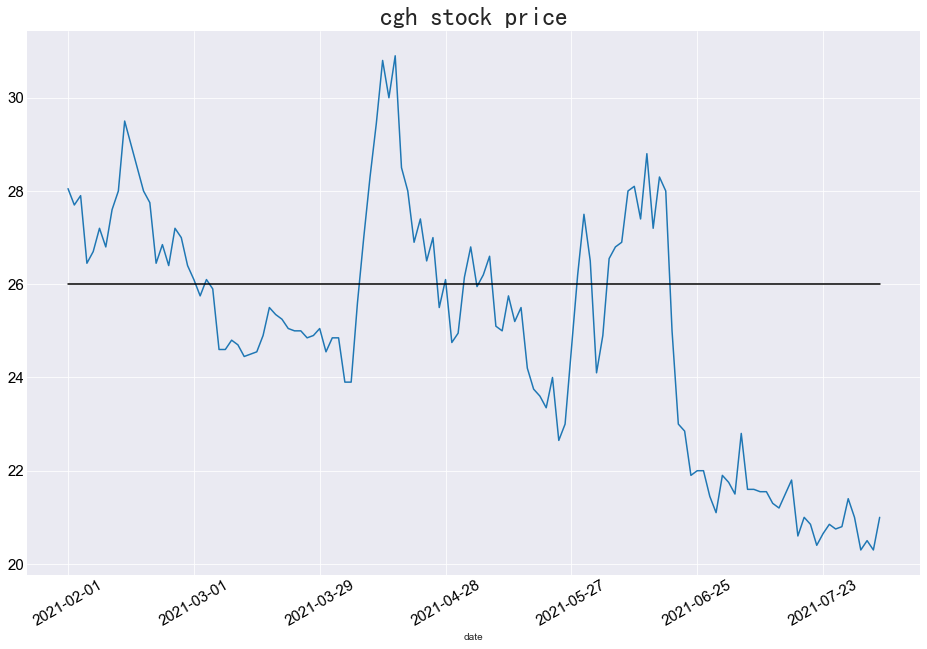

In [30]:
title = 'cgh stock price'
plt.figure(figsize=(16,10))
plt.style.use('seaborn-darkgrid')
cgh.cgh_close[cgh.index>=p1_date].plot()
cgh.p1_sprice[cgh.index>=p1_date].plot(color='k')
plt.yticks(fontsize=15,color='k')
plt.xticks( fontsize=15,color='k', rotation=30)
plt.title('{}'.format(title), fontproperties = 'SimHei',fontsize=25)
# plt.legend(('p1_profit','p2_profit'),loc="upper left", fontsize=20 );
plt.savefig('{}'.format(title),dpi=300,bbox_inches ='tight',pad_inches = 1,transparent = True,orientation ='landscape')
plt.show()

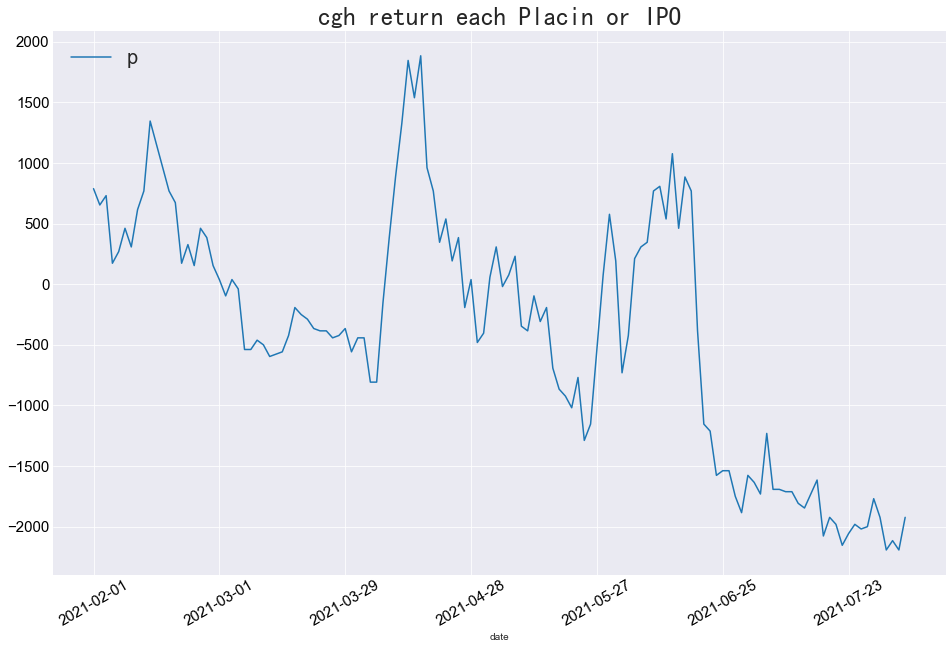

In [31]:
title = 'cgh return each Placin or IPO'
plt.figure(figsize=(16,10))
plt.style.use('seaborn-darkgrid')
cgh.p1_10k_rtn[cgh.index>=p1_date].plot()
plt.yticks(fontsize=15,color='k')
plt.xticks( fontsize=15,color='k', rotation=30)
plt.title('{}'.format(title), fontproperties = 'SimHei',fontsize=25)
plt.legend(('p1_profit'),loc="upper left", fontsize=20 );
plt.savefig('{}'.format(title),dpi=300,bbox_inches ='tight',pad_inches = 1,transparent = True,orientation ='landscape')
plt.show()

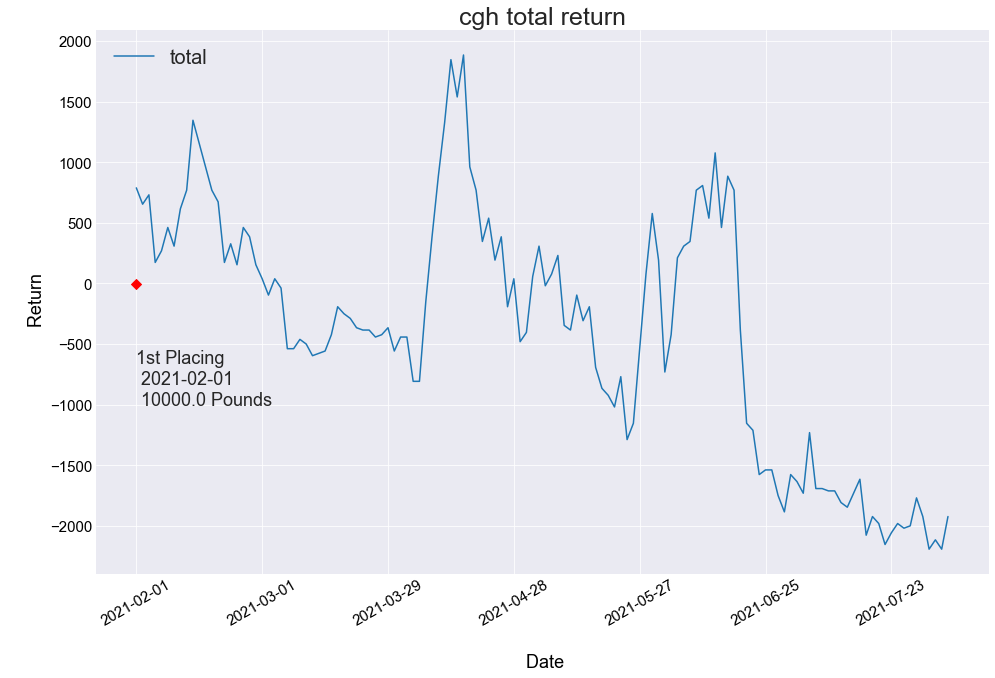

In [34]:
title = 'cgh total return'
plt.figure(figsize=(16,10))
plt.style.use('seaborn-darkgrid')
# cgh.loc[cgh.index >= p1_date].p1_10k_rtn.plot()
# cgh.loc[cgh.index >= p1_date].p2_10k_rtn.plot(color='r', alpha=0.8)
cgh.loc[cgh.index >= p1_date].total_rtn.plot()
plt.text(p1_date, 0-1000, '1st Placing \n {} \n {} Pounds'.format(p1_date, fund/split), fontsize=18)
# plt.text(p2_date, 0+500, '2nd Placing \n {} \n {} Pounds'.format(p2_date, fund/split), fontsize=18)
plt.scatter(p1_date, 0-1, color='r', marker='D', s=50)
# plt.scatter(p2_date, 0, color='r', marker='D', s=50)
plt.yticks(fontsize=15,color='k')
plt.xticks( fontsize=15,color='k', rotation=30)
plt.title('{}'.format(title), fontsize=25)
plt.legend(['total'],loc="upper left", fontsize=20 )
plt.ylabel('\n Return', fontsize=18, color='k')
plt.xlabel('\n Date', fontsize=18,color='k')
plt.savefig('{}'.format(title),dpi=300,bbox_inches ='tight',pad_inches = 1,transparent = True,orientation ='landscape')

plt.show()

In [184]:
pwd

'/Users/paxton615/Github_Personal/Notes/Notes/Financial_models/SI Stocks'

In [ ]:
cobr.to_csv(r'/Users/paxton615/Desktop/cobr.csv')